In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle

%matplotlib notebook

<IPython.core.display.Javascript object>


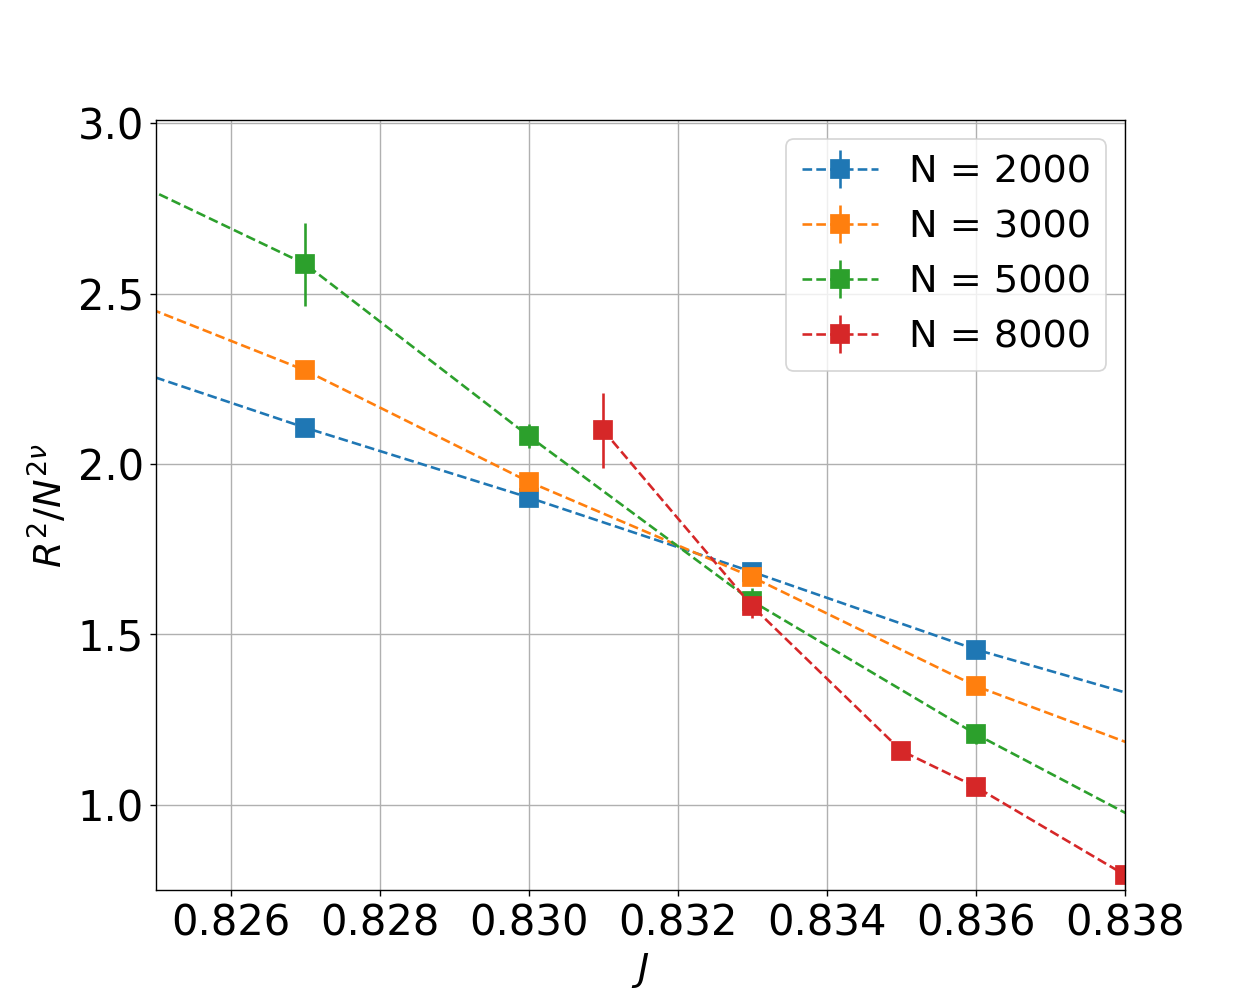

In [27]:
data_np = np.loadtxt("Ising/Canonical_near_phase/longnear1.txt", skiprows=1)
y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

nu=4/7
for l in lengths:
    
    if (l>5000):
        continue
 
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    r_l = data_l[:, 3]
    
    bc = r_l/np.power(l, 2*nu)
  
    errs = data_l[:, 4]/np.power(l, 2*nu)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
 
 
data_np = np.loadtxt("Ising/Main2/longnear.txt", skiprows=0)
#data_np = np.loadtxt("Ising/ClusterUpdate/longnear2.txt")

#data_np = np.loadtxt("Ising/Geometry_Results/long/Energy_Ising.txt", skiprows=0)
l=8000
data_l = data_np[data_np[:,0]==l]   
r_l = data_l[:, 3]
rl_scale = r_l/np.power(l, 2*nu)
err = data_l[:, 4]/np.power(l, 2*nu)
plt.errorbar(data_l[:,1], rl_scale, yerr=err, fmt="s--", ms = 10, label = "N = " + str(l))
     
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ R^2/N^{2 \nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 

plt.ylim(0.75, 3.01)
plt.xlim(0.825, 0.838)

plt.legend(fontsize=22)

#plt.grid()
plt.grid()

<IPython.core.display.Javascript object>


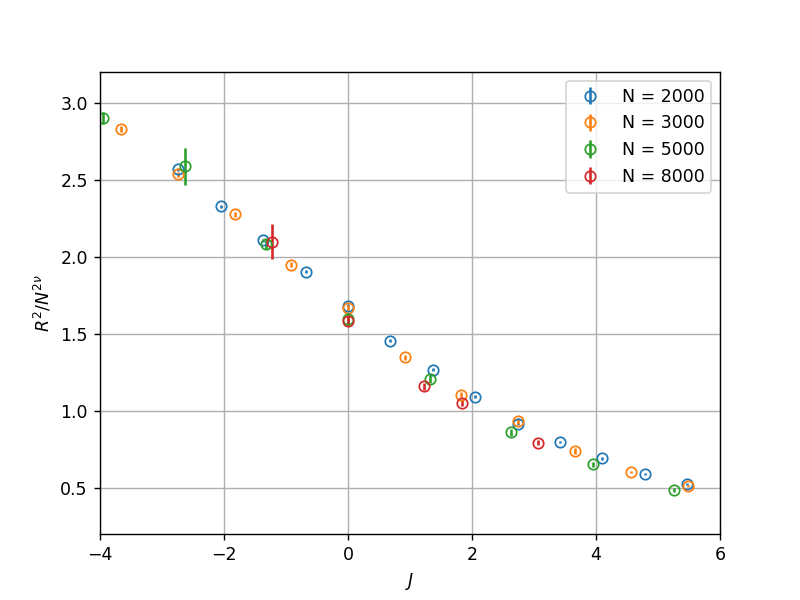

In [93]:
data_np = np.loadtxt("Ising/Canonical_near_phase/longnear1.txt", skiprows=1)
y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

lengths = np.unique(data_np[:, 0])
fig = plt.figure() #(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=4/7
phi = 5.0/7
J_theta = 0.833

for l in lengths:
    
    if (l>5000):
        continue
 
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    r_l = data_l[:, 3]
    
    bc = r_l / l**(2*nu)
    errs = data_l[:, 4] / l**(2*nu)

    plt.errorbar((J_l - J_theta) * l**phi,
                 bc, yerr=errs,
                 fmt="o", ms=6, fillstyle='none', label="N = %d"%l)
 
 
data_np = np.loadtxt("Ising/Main2/longnear.txt", skiprows=0)
l=8000
data_l = data_np[data_np[:,0]==l]   
r_l = data_l[:, 3]
rl_scale = r_l / l**(2*nu)
err = data_l[:, 4] / l**(2*nu)
plt.errorbar((data_l[:,1] - J_theta) * l**phi, 
             rl_scale, yerr=err,
             fmt="o", ms=6, fillstyle='none', label="N = %d"%l)


plt.xlabel(r'$J$') #, fontsize = 22)
plt.ylabel(r"$ R^2/N^{2 \nu} $ ") #, fontsize=22)
plt.tick_params(axis='x') #, labelsize=24) 
plt.tick_params(axis='y') #, labelsize=24) 

plt.ylim(0.2, 3.2)
plt.xlim(-4, 6)

plt.legend() #fontsize=22)

#plt.grid()
plt.grid()

In [13]:
data_np = np.loadtxt("Ising/Canonical_near_phase/longnear1.txt", skiprows=1)
y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]
data_np

array([[2.00000e+03, 8.21000e-01, 0.00000e+00, ..., 1.85842e-02,
        2.67092e-04, 1.02000e+12],
       [3.00000e+03, 8.21000e-01, 0.00000e+00, ..., 1.03117e-02,
        2.41182e-04, 9.70000e+11],
       [5.00000e+03, 8.21000e-01, 0.00000e+00, ..., 4.92283e-03,
        1.67224e-04, 9.20000e+11],
       ...,
       [3.00000e+03, 8.57000e-01, 0.00000e+00, ..., 5.05535e-01,
        4.74887e-03, 3.30000e+11],
       [5.00000e+03, 8.57000e-01, 0.00000e+00, ..., 4.34320e-01,
        8.98778e-02, 2.70000e+11],
       [7.50000e+03, 8.57000e-01, 0.00000e+00, ..., 2.09608e-01,
        1.48462e-02, 3.50000e+11]])

In [14]:
data_np.shape

(64, 20)

In [16]:
data_np[:, 0]

array([ 2000.,  3000.,  5000.,  7500., 10000.,  2000.,  3000.,  5000.,
        7500., 10000.,  2000.,  3000.,  5000.,  7500., 10000.,  2000.,
        3000.,  5000.,  7500., 10000.,  2000.,  3000.,  5000.,  7500.,
       10000.,  2000.,  3000.,  5000.,  7500., 10000.,  2000.,  3000.,
        5000.,  7500., 10000.,  2000.,  3000.,  5000.,  7500., 10000.,
        2000.,  3000.,  5000.,  7500., 10000.,  2000.,  3000.,  5000.,
        7500., 10000.,  2000.,  3000.,  5000.,  7500., 10000.,  2000.,
        3000.,  5000.,  7500., 10000.,  2000.,  3000.,  5000.,  7500.])

# Clean up data for L <= 5000

In [75]:
data_np = np.loadtxt("Ising/Canonical_near_phase/longnear1.txt", skiprows=1)
y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

dt = [("L", int), ("J", float), ("R2", float), ("err", float)]
data = np.empty(64, dtype=dt)
data["L"] = data_np[:, 0]
data["J"] = data_np[:, 1]
data["R2"] = data_np[:, 3]
data["err"] = data_np[:, 4]

mask_L = data["L"] < 7000
data = data[mask_L]

mask_J = (0.833-0.015 < data["J"]) & (data["J"] < 0.833+0.015)
data = data[mask_J]
data

array([(2000, 0.821, 15208.3 ,   74.2254),
       (3000, 0.821, 26656.5 ,  168.117 ),
       (5000, 0.821, 54830.1 ,  668.699 ),
       (2000, 0.824, 13784.7 ,   60.3409),
       (3000, 0.824, 23875.9 ,  163.397 ),
       (5000, 0.824, 48965.1 ,  666.298 ),
       (2000, 0.827, 12480.7 ,   50.8816),
       (3000, 0.827, 21422.1 ,  177.336 ),
       (5000, 0.827, 43672.  , 2053.23  ),
       (2000, 0.83 , 11266.2 ,   57.4178),
       (3000, 0.83 , 18342.8 ,  150.732 ),
       (5000, 0.83 , 35147.8 ,  581.068 ),
       (2000, 0.833,  9972.85,   60.1296),
       (3000, 0.833, 15707.2 ,  195.343 ),
       (5000, 0.833, 26962.7 ,  666.739 ),
       (2000, 0.836,  8624.09,   59.9608),
       (3000, 0.836, 12695.8 ,  146.143 ),
       (5000, 0.836, 20380.  ,  467.    ),
       (2000, 0.839,  7505.77,   51.5962),
       (3000, 0.839, 10389.9 ,  145.427 ),
       (5000, 0.839, 14542.6 ,  385.338 ),
       (2000, 0.842,  6458.5 ,   54.7297),
       (3000, 0.842,  8789.51,  159.301 ),
       (500

In [44]:
data.shape

(12,)

<IPython.core.display.Javascript object>


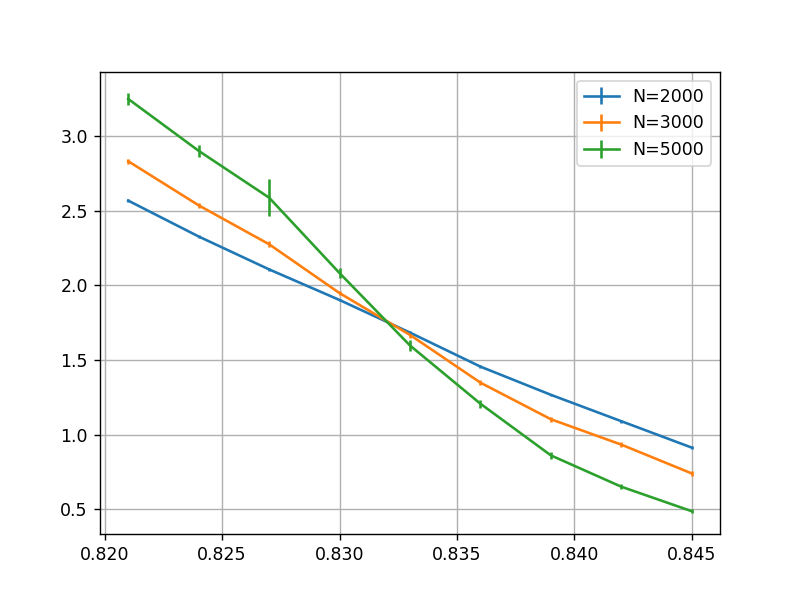

In [81]:
for L in np.unique(data["L"]):
    d = data[data["L"] == L]
    plt.errorbar(d["J"], d["R2"] / d["L"]**(2*nu), yerr=d["err"]/ d["L"]**(2*nu), label="N=%d"%L)

plt.grid()
plt.legend()

# clean up data for L=8000

In [77]:
data_np1 = np.loadtxt("Ising/Main2/longnear.txt", skiprows=0)
y= np.argsort(data_np1[:, 1],kind='mergesort')
data_np1=data_np1[y]

dt = [("L", int), ("J", float), ("R2", float), ("err", float)]
data1 = np.empty(20, dtype=dt)
data1["L"] = data_np1[:, 0]
data1["J"] = data_np1[:, 1]
data1["R2"] = data_np1[:, 3]
data1["err"] = data_np1[:, 4]

mask_L = data1["L"] == 8000
data1 = data1[mask_L]

mask_J = (0.833-0.015 < data1["J"]) & (data1["J"] < 0.833+0.015)
data1 = data1[mask_J]
data1

array([(8000, 0.831, 60629., 3210.), (8000, 0.833, 45705.,  973.),
       (8000, 0.835, 33462.,  659.), (8000, 0.836, 30401.,  696.),
       (8000, 0.838, 22936.,  514.)],
      dtype=[('L', '<i8'), ('J', '<f8'), ('R2', '<f8'), ('err', '<f8')])

In [78]:
data.shape, data1.shape

((27,), (5,))

In [79]:
data_all = np.empty(32, dtype=dt)
data_all[:27] = data
data_all[27:] = data1
data_all

array([(2000, 0.821, 15208.3 ,   74.2254),
       (3000, 0.821, 26656.5 ,  168.117 ),
       (5000, 0.821, 54830.1 ,  668.699 ),
       (2000, 0.824, 13784.7 ,   60.3409),
       (3000, 0.824, 23875.9 ,  163.397 ),
       (5000, 0.824, 48965.1 ,  666.298 ),
       (2000, 0.827, 12480.7 ,   50.8816),
       (3000, 0.827, 21422.1 ,  177.336 ),
       (5000, 0.827, 43672.  , 2053.23  ),
       (2000, 0.83 , 11266.2 ,   57.4178),
       (3000, 0.83 , 18342.8 ,  150.732 ),
       (5000, 0.83 , 35147.8 ,  581.068 ),
       (2000, 0.833,  9972.85,   60.1296),
       (3000, 0.833, 15707.2 ,  195.343 ),
       (5000, 0.833, 26962.7 ,  666.739 ),
       (2000, 0.836,  8624.09,   59.9608),
       (3000, 0.836, 12695.8 ,  146.143 ),
       (5000, 0.836, 20380.  ,  467.    ),
       (2000, 0.839,  7505.77,   51.5962),
       (3000, 0.839, 10389.9 ,  145.427 ),
       (5000, 0.839, 14542.6 ,  385.338 ),
       (2000, 0.842,  6458.5 ,   54.7297),
       (3000, 0.842,  8789.51,  159.301 ),
       (500

<IPython.core.display.Javascript object>


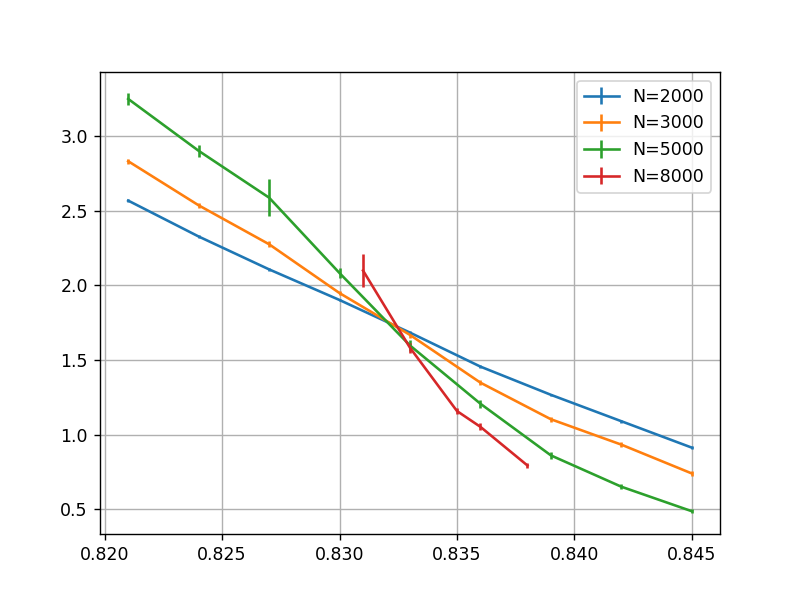

In [82]:
for L in np.unique(data_all["L"]):
    d = data_all[data_all["L"] == L]
    plt.errorbar(d["J"], d["R2"] / d["L"]**(2*nu), yerr=d["err"]/ d["L"]**(2*nu), label="N=%d"%L)

plt.grid()
plt.legend()

# Data collapse, visual inspection

Claim

$$
J_c = 0.833(1) \qquad\qquad \phi = 0.7(1)
$$

<IPython.core.display.Javascript object>


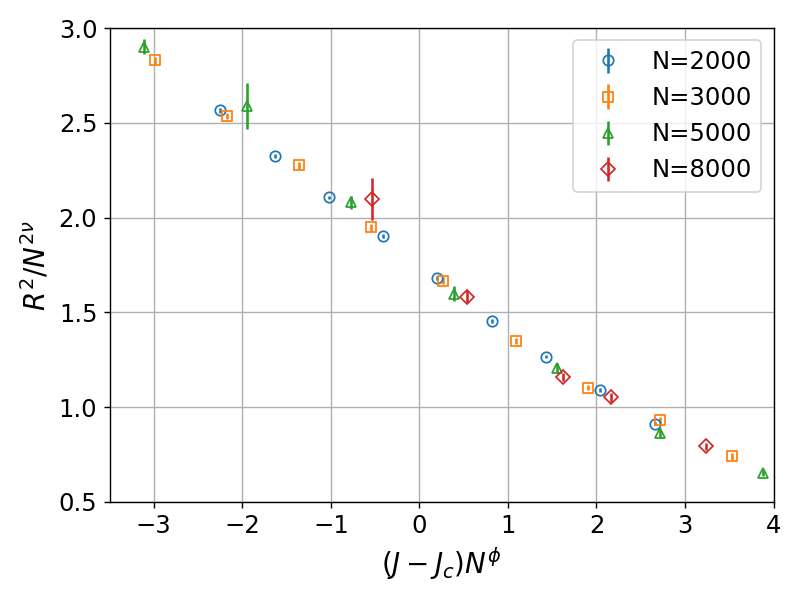

In [146]:
data_scale = data_all.copy()
data_scale["R2"] = data_all["R2"] / data_all["L"]**(2*nu)
data_scale["err"] = data_all["err"] / data_all["L"]**(2*nu)

Jc = 0.832
theta = 0.7

markers = ['o', 's', '^', 'D']

for L, m in zip(np.unique(data_scale["L"]), markers):
    d = data_scale[data_scale["L"] == L]
    plt.errorbar((d["J"] - Jc) * L**theta, d["R2"], yerr=d["err"], label="N=%d"%L,
                fmt=m, ms=6, fillstyle='none',)

plt.xlabel(r'$(J - J_c) N^\phi$', fontsize=16)
plt.ylabel(r'$R^2 / N^{2\nu}$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([-3.5, 4])
plt.ylim([0.5, 3.0])
plt.grid()
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('R2_data_collapse_phi.png', bbox_inches='tight')

In [138]:
!pwd

/home/br/sweethome/SAW/KF_Ising/saw


In [116]:
5/7, 3/7

(0.7142857142857143, 0.42857142857142855)

# Fit 

[ 1.81718204 -1.387587    0.51410931  0.83145517]
[[0.01540299        nan        nan        nan]
 [       nan 0.1284117  0.03870113 0.00420773]
 [       nan 0.03870113 0.01167679 0.00127946]
 [       nan 0.00420773 0.00127946 0.00019844]]


<ipython-input-84-b6b17484e437>:13: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(pcov))


<IPython.core.display.Javascript object>


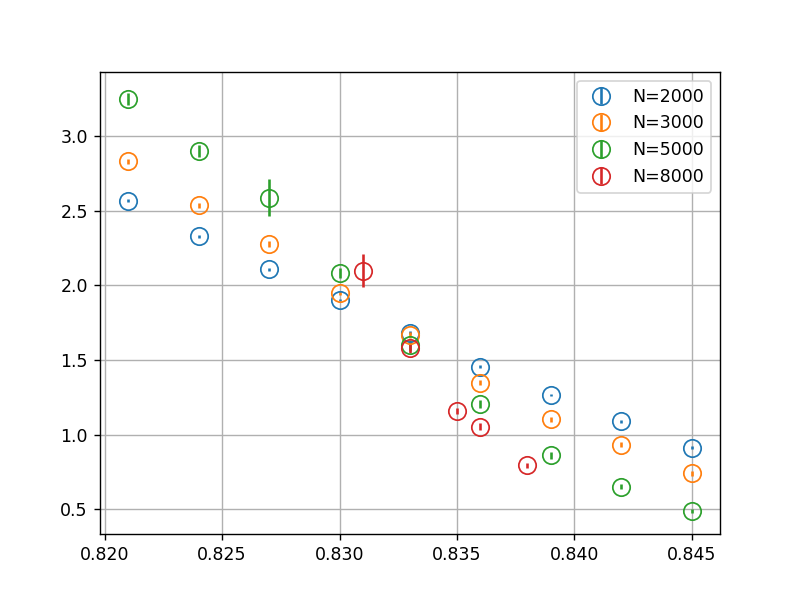

In [84]:
def fitfunc(LJ, a, b, ph, Jc):
    """$ R^2 / L^{2\nu} = f0 + f1 * L^\phi (J-J_c) $"""
    L, J = LJ
    res = a + b*(J - Jc)*L**ph
#    res *= 1. + c*L**(-0.5)
    return res

popt, pcov = curve_fit(fitfunc, (data_scale["L"], data_scale["J"]),
                       data_scale["R2"],
                       sigma=data_scale["err"], absolute_sigma=True)

print(popt)
print(np.sqrt(pcov))


ph = popt[-2]
Jc = popt[-1]

for L in np.unique(data_scale["L"]):
    d = data_scale[data_scale["L"]==L]
    plt.errorbar(d["J"], d["R2"], yerr=d["err"],
                 label="N=%d"%L, fmt="o", ms=10, fillstyle='none')
    
plt.grid()
plt.legend(loc='best')

[  4.3465303  -11.65365386 -16.43369043   0.29429086   0.81776545]
[[3.72218649e-01            nan            nan            nan
             nan]
 [           nan 2.33017254e+00 1.36846162e+00 2.27946548e-01
  7.10537454e-02]
 [           nan 1.36846162e+00 9.06638444e-01 1.31456013e-01
  4.27829773e-02]
 [           nan 2.27946548e-01 1.31456013e-01 2.23574634e-02
  6.93393322e-03]
 [           nan 7.10537454e-02 4.27829773e-02 6.93393322e-03
  2.19470694e-03]]


<ipython-input-85-3f413e81ba28>:14: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(pcov))


<IPython.core.display.Javascript object>


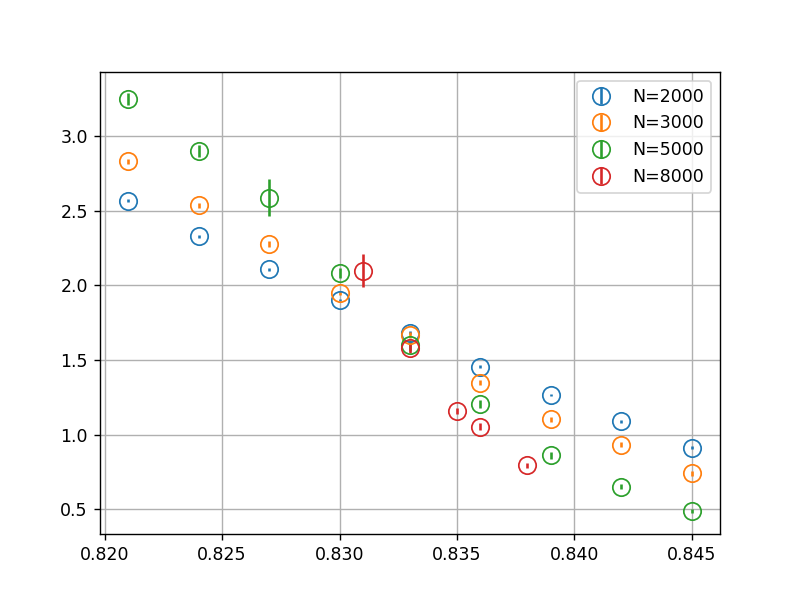

In [85]:
def fitfunc(LJ, a, b, c, ph, Jc):
    """$ R^2 / L^{2\nu} = f0 + f1 * L^\phi (J-J_c) $"""
    L, J = LJ
    res = a + b*(J - Jc)*L**ph
    res *= 1. + c*L**(-0.5)
    return res

popt, pcov = curve_fit(fitfunc, (data_scale["L"], data_scale["J"]),
                       data_scale["R2"],
                       sigma=data_scale["err"], absolute_sigma=True,
                       p0 = [1, 1, 1, 5/7, 0.83])

print(popt)
print(np.sqrt(pcov))

ph = popt[-2]
Jc = popt[-1]

for L in np.unique(data_scale["L"]):
    d = data_scale[data_scale["L"]==L]
    plt.errorbar(d["J"], d["R2"], yerr=d["err"],
                 label="N=%d"%L, fmt="o", ms=10, fillstyle='none')
    
plt.grid()
plt.legend(loc='best')